## IMPORT THE NECESSARRY LIABRARIES.....

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_with_features.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Cabin IS NOT DEFINED,Q,0,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Cabin IS NOT DEFINED,S,1,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Cabin IS NOT DEFINED,Q,0,Elderly
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Cabin IS NOT DEFINED,S,0,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Cabin IS NOT DEFINED,S,2,Young Adult


## HANDLING NULL VALUES 

In [4]:

df["Cabin"]= df["Cabin"].fillna("Cabin IS NOT DEFINED")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
 12  FamilySize   418 non-null    int64  
 13  AgeGroup     332 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000


## PLOT THE CHART FOR THE SURVIVAL RATIO......

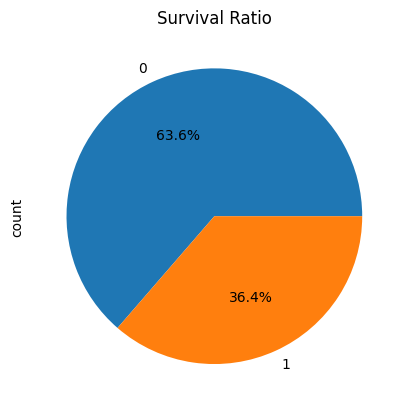

In [6]:


# Plotting the pie chart
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
plt.title('Survival Ratio')
plt.show()



## PLOT THE CHART FOR SURVIVAL RATIO BY AGE GROUPS.....

In [7]:

# # Survival rates by age group
# age_groups = pd.cut(df['Age'], bins=[0, 18, 60, float('inf')], labels=['Child', 'Adult', 'Elderly'])
age_survival_rates = df.groupby('AgeGroup')['Survived'].mean()

# Survival rates by sex
sex_survival_rates = df.groupby('Sex')['Survived'].mean()

# Survival rates by passenger class
class_survival_rates = df.groupby('Pclass')['Survived'].mean()

print("Survival Rates by Age Group:")
print(age_survival_rates)
print("\nSurvival Rates by Sex:")
print(sex_survival_rates)
print("\nSurvival Rates by Passenger Class:")
print(class_survival_rates)

Survival Rates by Age Group:
AgeGroup
Adult          0.346535
Child          0.444444
Elderly        0.483871
Young Adult    0.363014
Name: Survived, dtype: float64

Survival Rates by Sex:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

Survival Rates by Passenger Class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


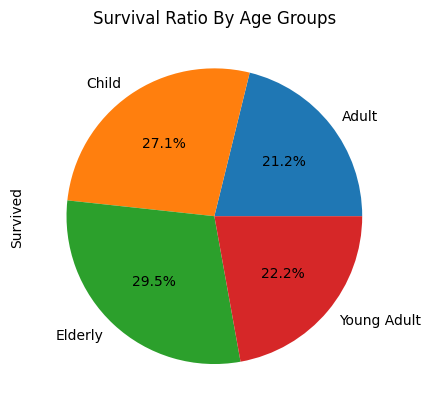

In [8]:
age_survival_rates.plot(kind='pie',autopct='%1.1f%%' )
plt.title('Survival Ratio By Age Groups')
plt.show()

## PLOT THE CHART FOR SURVIVAL RATIO BY SEX RATES.....

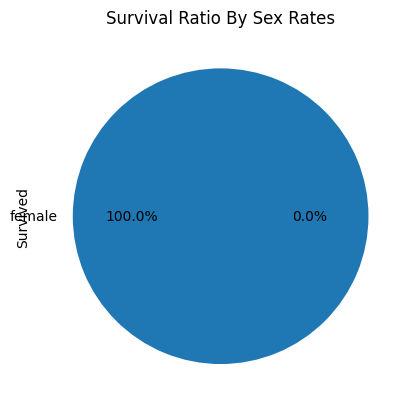

In [9]:
sex_survival_rates.plot(kind='pie',autopct='%1.1f%%' )
plt.title('Survival Ratio By Sex Rates')
plt.show()

## PLOT THE CHART FOR SURVIVAL RATIO BY PASSENGERS CLASS.....

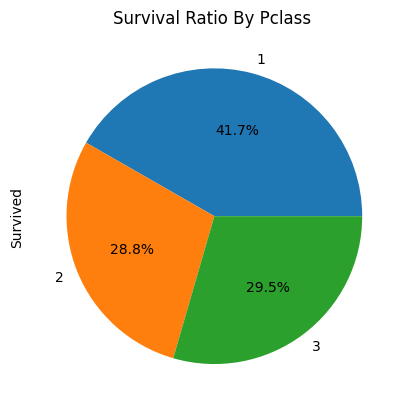

In [10]:
class_survival_rates.plot(kind='pie',autopct='%1.1f%%' )
plt.title('Survival Ratio By Pclass ')
plt.show()

## PLOT THE CHART FOR DISTRIBUTION OF PASSENGERS BY GENDRE.....

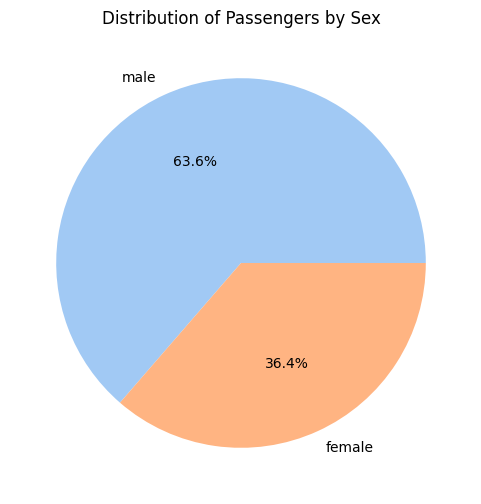

In [11]:

# Count the number of passengers by sex
passengers_by_sex = df['Sex'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')  # Set color palette
plt.pie(passengers_by_sex, labels=passengers_by_sex.index, autopct='%1.1f%%')
plt.title('Distribution of Passengers by Sex')
plt.show()

## PLOT THE CHART FOR TO KNOW THAT HOW MANY PASSENGERS ARE TRAVELLED FROM EACH PORT.....

Passengers embarked from each port:
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


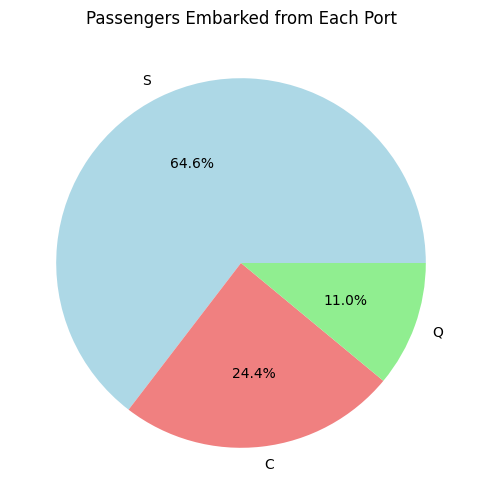

In [12]:
# 1. Count passengers by embarkation port
embark_counts = df['Embarked'].value_counts()

print("Passengers embarked from each port:")
print(embark_counts)
# Create labels and data for the pie chart
labels = embark_counts.index
sizes = embark_counts.values
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Create the pie chart for passengers by embarkation port
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Passengers Embarked from Each Port')
plt.show()

## PLOT THE CHART FOR TO KNOW THAT HOW MANY PASSENGERS ARE TRAVELLED IN EACH CLASS FROM EACH PORT.....

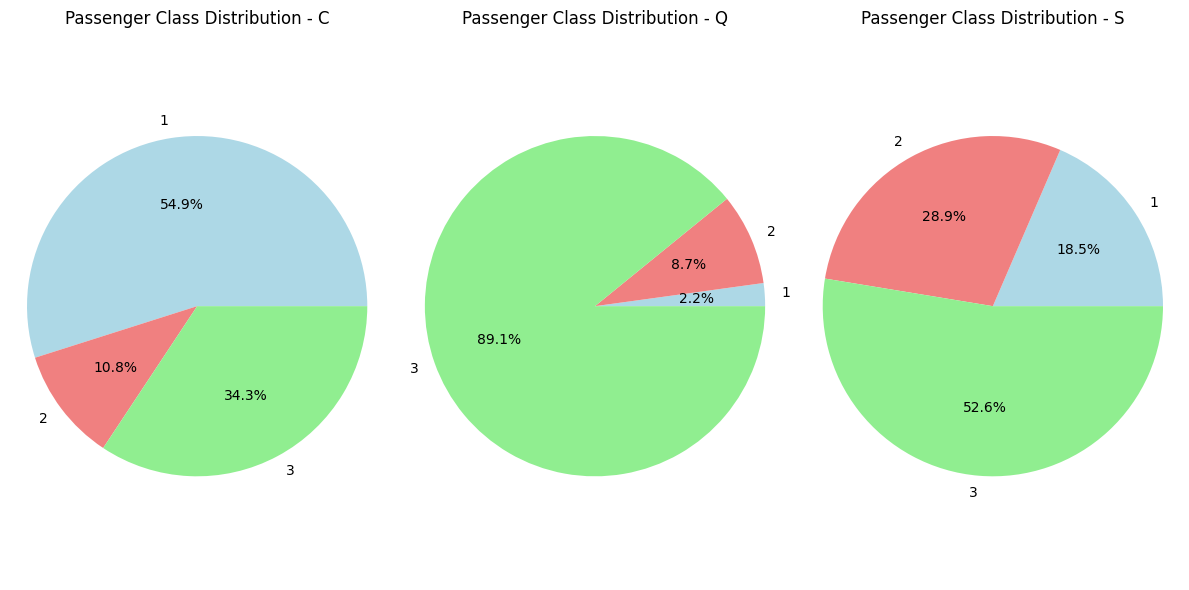

In [13]:
# 2. Passenger class distribution by embarkation port
pclass_counts_by_port = df.groupby(['Embarked', 'Pclass']).size().unstack()

# Create pie charts for passenger class distribution by embarkation port
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, port in enumerate(pclass_counts_by_port.index):
    sizes = pclass_counts_by_port.loc[port].values
    labels = pclass_counts_by_port.columns
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Passenger Class Distribution - {port}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

## PLOT THE CHART FOR TO KNOW THAT HOW MANY PASSENGERS ARE SURVIVED FROM EACH PORT.....

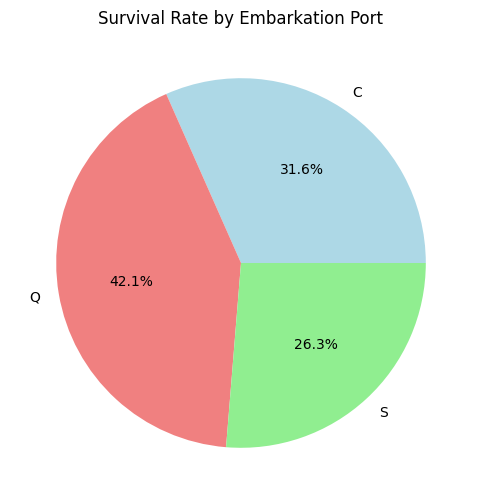

In [14]:

# Survival rate by embarkation port
survival_rate_by_port = df.groupby('Embarked')['Survived'].mean().reset_index()

# Create labels and data for the pie chart
labels = survival_rate_by_port['Embarked']
sizes = survival_rate_by_port['Survived']
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Create the pie chart for survival rate by embarkation port
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Survival Rate by Embarkation Port')
plt.show()

## PLOT THE CHART FOR TO KNOW THAT WHETHER MORE INDIVIDUALS HAD SURVIVED OR GROUPS HAD SURVIVED.....

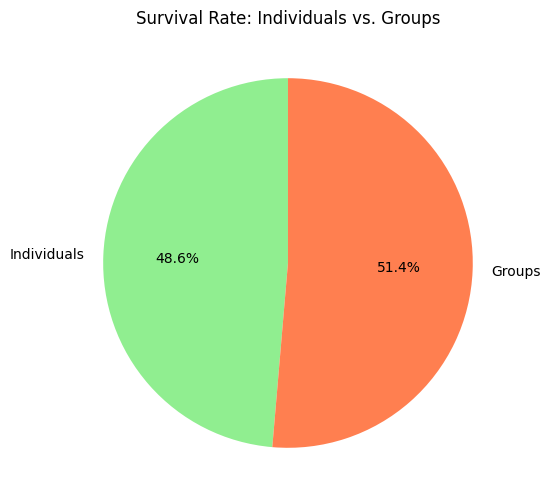

In [17]:

# Calculate survival rates for groups and individuals
survival_rates = df['Survived'].mean()
individual_survival_rate = df[df['FamilySize'] == 1]['Survived'].mean()

# Create a pie chart to visualize survival rates among groups and individuals
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [individual_survival_rate, 1 - individual_survival_rate]
labels = ['Individuals', 'Groups']

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'coral'])
ax.set_title('Survival Rate: Individuals vs. Groups')
plt.show()

# THANK YOU...........